# Field correlations in Atom-Cavity systems
A reproduction and verification of Rebic et al. PRA **69**, 035804 (2004)

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Note, it works fine to truncate at 4 (as in the paper)
# QuTiP can do much larger space just fine so feel free to increase this.
N=4

taus=np.linspace(0,10,500)

The states will be $\big|m\big\rangle \otimes \big|n\big\rangle$ where $\big|m\big\rangle$ are atomic states 1-4 and $\big|n\big\rangle$ are the photon states. Therefore we need to construct tensor operators:

In [3]:
a=tensor(identity(2), destroy(N))
sm=tensor(sigmam(),identity(N))
sz=tensor(sigmaz(),identity(N))

In [4]:
kappa = 1  # the cavity decay rate, all other rates given in terms of kappa:
g = 6*kappa
theta = g
Ep = 0.1*kappa
gamma = 0.1*kappa

Hint = theta*(0.5*sz + a.dag()*a) + 1j*g*(a.dag()*sm - a*sm.dag())
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm]

rho0=tensor(fock_dm(2,0),fock_dm(N,0)) # start with empty cavity and in atomic ground state.

In [5]:
n_op = a.dag()*a
solution = mesolve(H,rho0,taus, c_ops, [n_op])
n = solution.expect[0]

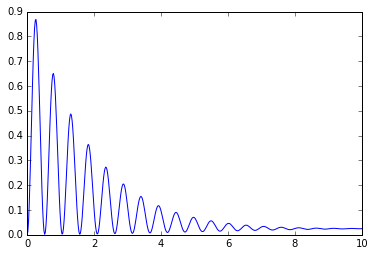

In [7]:
plt.plot(taus,n)

In [13]:
# 1st order correlation:
g1 = coherence_function_g1(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


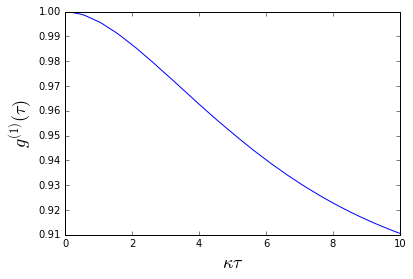

In [19]:
plt.plot(taus,g1)
plt.ylabel(r"$g^{(1)}(\tau)$",fontsize=18)
plt.xlabel(r"$\kappa\tau$",fontsize=18)

In [20]:
# 2nd order correlation
g2_weak = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


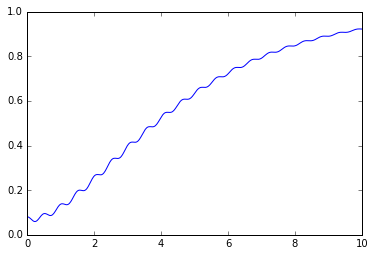

In [21]:
plt.plot(taus,g2_weak)

The two curves they show are for different values of g and pump, we'll try that here:

In [22]:
kappa = 1
g = 20*kappa
theta = g
Ep = 0.5*kappa
gamma = 0.1*kappa

Hint = theta*(0.5*sz + a.dag()*a) + 1j*g*(a.dag()*sm - a*sm.dag())
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm]

rho0=tensor(fock_dm(2,0),fock_dm(N,0))

In [23]:
g2_strong = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


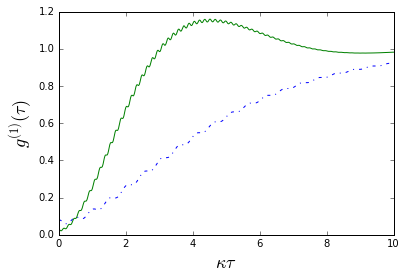

In [25]:
plt.plot(taus,g2_weak,"-.")
plt.plot(taus,g2_strong)
plt.ylabel(r"$g^{(1)}(\tau)$",fontsize=18)
plt.xlabel(r"$\kappa\tau$",fontsize=18)

Very nice agreement here.

Next, look at the other model (EIT Kerr) and compare.

Now for the EIT Kerr approach:

In [26]:
# Define four level system and field:
N=4  # photons to track in the field

a=tensor(identity(4), destroy(N))

# the atomic levels:
one = Qobj([[1],[0],[0],[0]])
one = tensor(one, identity(N))
two = Qobj([[0],[1],[0],[0]])
two = tensor(two, identity(N))
three = Qobj([[0],[0],[1],[0]])
three = tensor(three, identity(N))
four = Qobj([[0],[0],[0],[1]])
four = tensor(four, identity(N))

# populations and coherences:
sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()
sig44 = four * four.dag()
sig12 = one * two.dag()
sig13 = one * three.dag()
sig23 = two * three.dag()
sig24 = two * four.dag()

In [27]:
# Note, reversing the subscript is equivalent to taking the dagger:
sig13.dag() == three * one.dag()

True

In [42]:
# Definitions for the EIT model:
taus=np.linspace(0,10,1000)

kappa = 1
gamma = 0.1*kappa
Delta = 0.0
g1 = 6*kappa
g2 = 6*kappa

# For dashed line in plot:
delta = 0.2*kappa
OmegaC = 6*kappa
Ep = 0.7*kappa

Hint = delta*sig33 + Delta*sig44 + 1j*(g1*(a.dag()*sig13 - sig13.dag()*a) + OmegaC*(sig23 - sig23.dag()) + g2*(a.dag()*sig24 - sig24.dag()*a))
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma + gamma)*sig33,np.sqrt(gamma)*sig44] # TODO: check the s33 and s44 decays.

rho0=tensor(fock_dm(4,0),fock_dm(N,0))

In [43]:
n_op = a.dag()*a
exp_ops = [n_op,sig11,sig22,sig33,sig44]
solution = mesolve(H,rho0,taus, c_ops, exp_ops)
n = solution.expect[0]

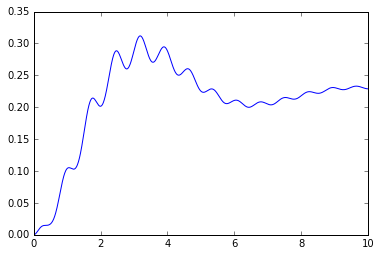

In [44]:
# Check the cavity photon number << 4
plt.plot(taus,n)

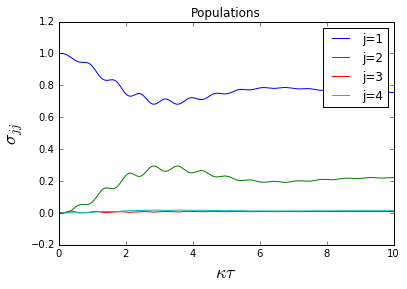

In [45]:
# Look at the level populations:
for i,v in enumerate(solution.expect[1:]):
    plt.plot(taus,v,label="j={}".format(i+1))
    
plt.ylim(-0.2,1.2)
plt.legend()
plt.title("Populations")
plt.ylabel(r"$\sigma_{jj}$",fontsize=18)
plt.xlabel(r"$\kappa\tau$",fontsize=18)

In [46]:
g2_eit = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


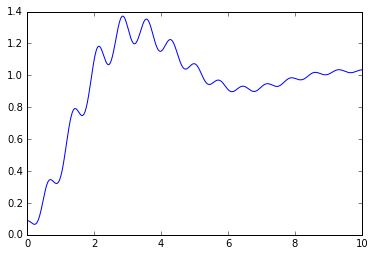

In [47]:
plt.plot(taus,g2_eit)

In [48]:
# Repeat for different conditions:
taus=np.linspace(0,10,1000)

kappa = 1
gamma = 0.1*kappa
Delta = 0.0
g1 = 6*kappa
g2 = 6*kappa

# For solid line:
delta = 4*kappa
OmegaC = 12*kappa
Ep = 0.1*kappa

Hint = delta*sig33 + Delta*sig44 + 1j*(g1*(a.dag()*sig13 - sig13.dag()*a) + OmegaC*(sig23 - sig23.dag()) + g2*(a.dag()*sig24 - sig24.dag()*a))
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma + gamma)*sig33,np.sqrt(gamma)*sig44] # TODO: check the s33 and s44 decays.

rho0=tensor(fock_dm(4,0),fock_dm(N,0))

In [49]:
g2_eit_solid = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


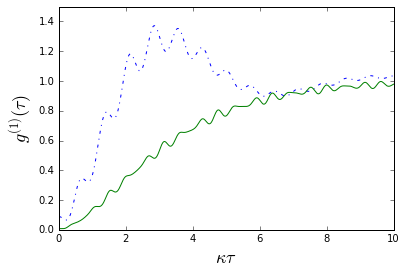

In [51]:
plt.plot(taus,g2_eit,"-.")
plt.plot(taus,g2_eit_solid)
plt.ylim(0,1.5)
plt.ylabel(r"$g^{(1)}(\tau)$",fontsize=18)
plt.xlabel(r"$\kappa\tau$",fontsize=18)

Once again, great agreement here!

In [ ]:
print(qutip.__version__)

import sys
print(sys.version)